# Google BigQuery Connect with Jupyter notebook

In [5]:
import pydata_google_auth
credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
)

### Import Python module

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 1-0. 시간대별 데이터 상관관계

#### Import file from BigQuery

In [43]:
query = """SELECT *
FROM Time.timezone_count""" 
project_id = 'modular-magpie-255714'

In [44]:
tz = pd.read_gbq(query, project_id=project_id, dialect='standard', credentials=credentials)

In [45]:
tz

Timezone   Count
0          0  374735
1          1  219610
2          2  184447
3          3  148659
4          4  112056
5          5   93069
6          6  109397
7          7  157498
8          8  233201
9          9  294330
10        10  290426
11        11  306118
12        12  392080
13        13  328952
14        14  350129
15        15  368038
16        16  348083
17        17  354245
18        18  380226
19        19  394339
20        20  393118
21        21  383619
22        22  378242
23        23  312546

In [57]:
fig = go.Figure(data=go.Scatter(x=tz.Timezone, y=tz.Count,line = dict(color='#FF6F61', width = 2)))
fig.update_layout(title='All Crime Count by Timezone',
                   xaxis_title='Timezone',
                   yaxis_title='Count')
fig.show()

In [54]:
tz.corr()

Timezone     Count
Timezone  1.000000  0.706929
Count     0.706929  1.000000

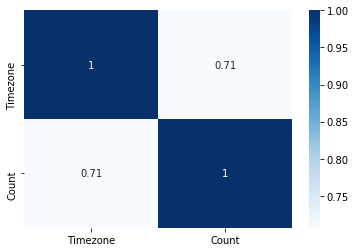

In [55]:
# plt.figure(figsize=(15,15))
ax = sns.heatmap(tz.corr(), annot = True, cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [51]:
tzdf = pd.get_dummies(tz,columns = ["Timezone"])

In [52]:
tzdf.corr()

Count  Timezone_0  Timezone_1  Timezone_2  Timezone_3  \
Count        1.000000    0.180106   -0.141266   -0.214113   -0.288254   
Timezone_0   0.180106    1.000000   -0.043478   -0.043478   -0.043478   
Timezone_1  -0.141266   -0.043478    1.000000   -0.043478   -0.043478   
Timezone_2  -0.214113   -0.043478   -0.043478    1.000000   -0.043478   
Timezone_3  -0.288254   -0.043478   -0.043478   -0.043478    1.000000   
Timezone_4  -0.364085   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_5  -0.403420   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_6  -0.369593   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_7  -0.269943   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_8  -0.113109   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_9   0.013531   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_10  0.005443   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_11  0.037952   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_12  0.216039   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_13  0.085258   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_14  0.129130   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_15  0.166232   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_16  0.124891   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_17  0.137657   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_18  0.191482   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_19  0.220719   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_20  0.218190   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_21  0.198511   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_22  0.187371   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_23  0.051269   -0.043478   -0.043478   -0.043478   -0.043478   

             Timezone_4  Timezone_5  Timezone_6  Timezone_7  Timezone_8  \
Count         -0.364085   -0.403420   -0.369593   -0.269943   -0.113109   
Timezone_0    -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_1    -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_2    -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_3    -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_4     1.000000   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_5    -0.043478    1.000000   -0.043478   -0.043478   -0.043478   
Timezone_6    -0.043478   -0.043478    1.000000   -0.043478   -0.043478   
Timezone_7    -0.043478   -0.043478   -0.043478    1.000000   -0.043478   
Timezone_8    -0.043478   -0.043478   -0.043478   -0.043478    1.000000   
Timezone_9    -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_10   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_11   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_12   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_13   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_14   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_15   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_16   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_17   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_18   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_19   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_20   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_21   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_22   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   
Timezone_23   -0.043478   -0.043478   -0.043478   -0.043478   -0.043478   

                ...       Timezone_14  Timezone_15  Timezone_16  Timezone_17  \
Count           ...          0.129130     0.166232     0.124891     0.137657   
Timezo

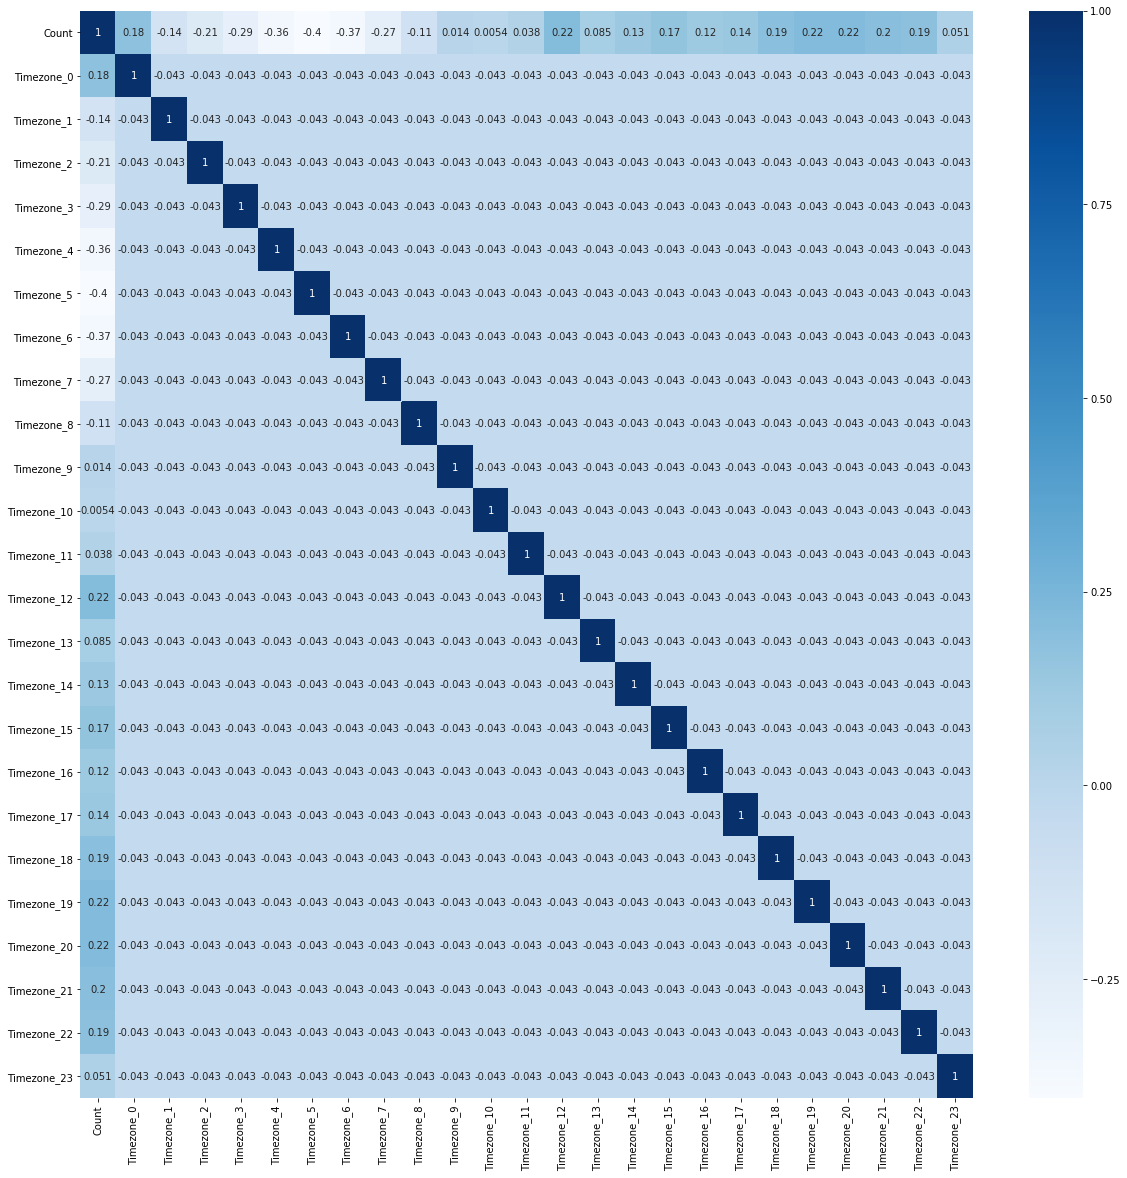

In [56]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(tzdf.corr(), annot = True, cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# 1-1. 요일별 데이터 상관관계

#### Import file from BigQuery

In [22]:
query = """SELECT *
FROM Time.1_week""" 
project_id = 'modular-magpie-255714'

In [23]:
week1_1 = pd.read_gbq(query, project_id=project_id, dialect='standard', credentials=credentials)

In [24]:
week1_1['Order'] = [2,1,4,5,6,3,7] 

In [25]:
week1_1_sort = week1_1.sort_values(["Order"])

In [26]:
week1_1_sort

Week    Count  Order
1     Monday   975047      1
0    Tuesday   988537      2
5  Wednesday   995147      3
2   Thursday   985634      4
3     Friday  1039988      5
4   Saturday   988347      6
6     Sunday   934463      7

In [27]:
wdf = pd.get_dummies(week1_1_sort)

In [28]:
wdf.corr()

Count         Order  Week_Friday  Week_Monday  \
Count           1.000000 -1.920815e-01     0.756366    -0.166052   
Order          -0.192082  1.000000e+00     0.204124    -0.612372   
Week_Friday     0.756366  2.041241e-01     1.000000    -0.166667   
Week_Monday    -0.166052 -6.123724e-01    -0.166667     1.000000   
Week_Saturday   0.022860  4.082483e-01    -0.166667    -0.166667   
Week_Sunday    -0.742505  6.123724e-01    -0.166667    -0.166667   
Week_Thursday  -0.015675 -1.133117e-17    -0.166667    -0.166667   
Week_Tuesday    0.025559 -4.082483e-01    -0.166667    -0.166667   
Week_Wednesday  0.119447 -2.041241e-01    -0.166667    -0.166667   

                Week_Saturday  Week_Sunday  Week_Thursday  Week_Tuesday  \
Count                0.022860    -0.742505  -1.567507e-02      0.025559   
Order                0.408248     0.612372  -1.133117e-17     -0.408248   
Week_Friday         -0.166667    -0.166667  -1.666667e-01     -0.166667   
Week_Monday         -0.166667    -0.166667  -1.666667e-01     -0.166667   
Week_Saturday        1.000000    -0.166667  -1.666667e-01     -0.166667   
Week_Sunday         -0.166667     1.000000  -1.666667e-01     -0.166667   
Week_Thursday       -0.166667    -0.166667   1.000000e+00     -0.166667   
Week_Tuesday        -0.166667    -0.166667  -1.666667e-01      1.000000   
Week_Wednesday      -0.166667    -0.166667  -1.666667e-01     -0.166667   

                Week_Wednesday  
Count                 0.119447  
Order                -0.204124  
Week_Friday          -0.166667  
Week_Monday          -0.166667  
Week_Saturday        -0.166667  
Week_Sunday          -0.166667  
Week_Thursday        -0.166667  
Week_Tuesday         -0.166667  
Week_Wednesday        1.000000

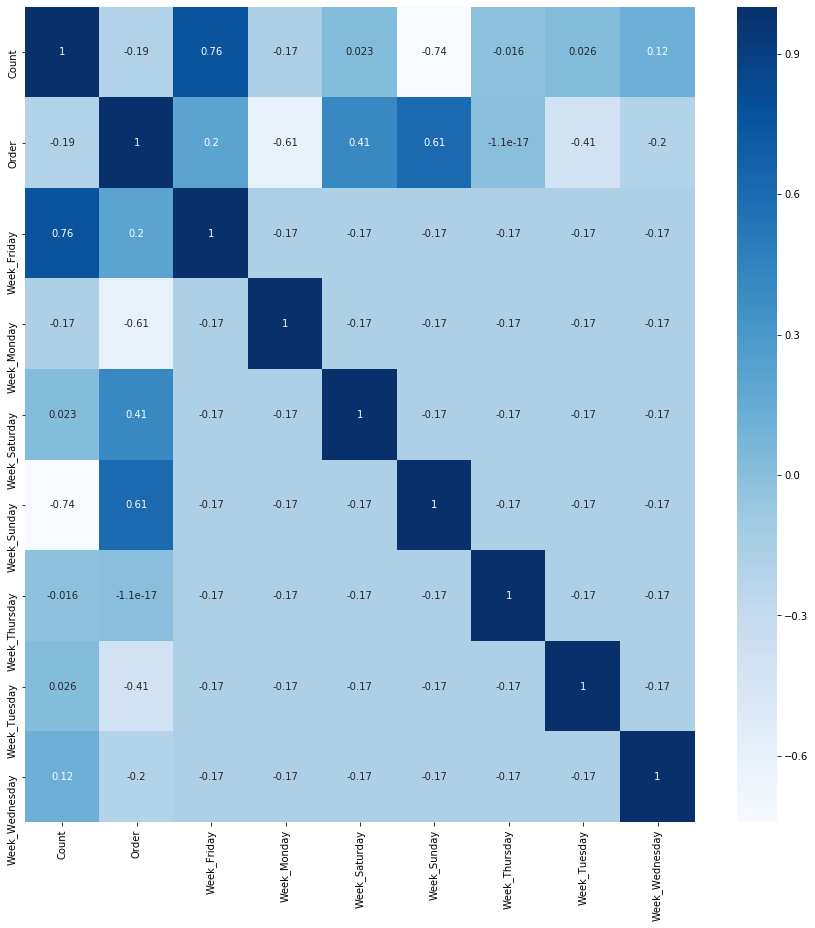

In [31]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(wdf.corr(), annot = True, cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Visualization

In [8]:
fig = go.Figure(data=go.Scatter(x=week1_1_sort.Week, y=week1_1_sort.Count,line = dict(color='#FF6F61', width = 2)))
fig.update_layout(title='All Crime Count by Day of Week',
                   xaxis_title='Week',
                   yaxis_title='Count')
fig.show()

# 1-2. 요일/시간대 별 상관관계

#### Import file from BigQuery

In [16]:
query = """SELECT *
FROM Time.1_week_time""" 
project_id = 'modular-magpie-255714'

In [17]:
week1_2 = pd.read_gbq(query, project_id=project_id, dialect='standard', credentials=credentials)

In [18]:
week1_2

Week  Timezone  Count
0       Friday         0  52207
1       Friday         1  28405
2       Friday         2  23209
3       Friday         3  18064
4       Friday         4  13673
5       Friday         5  12287
6       Friday         6  16205
7       Friday         7  24813
8       Friday         8  36850
9       Friday         9  45664
10      Friday        10  44473
11      Friday        11  46605
12      Friday        12  60133
13      Friday        13  49617
14      Friday        14  53532
15      Friday        15  57682
16      Friday        16  53422
17      Friday        17  54712
18      Friday        18  58471
19      Friday        19  59455
20      Friday        20  58760
21      Friday        21  58711
22      Friday        22  60137
23      Friday        23  52901
24      Monday         0  52784
25      Monday         1  27000
26      Monday         2  21337
27      Monday         3  16519
28      Monday         4  12812
29      Monday         5  11894
..         ...       ...    ...
138    Tuesday        18  55913
139    Tuesday        19  58378
140    Tuesday        20  57997
141    Tuesday        21  55516
142    Tuesday        22  52940
143    Tuesday        23  41199
144  Wednesday         0  49904
145  Wednesday         1  25330
146  Wednesday         2  19867
147  Wednesday         3  15145
148  Wednesday         4  11537
149  Wednesday         5  11312
150  Wednesday         6  16170
151  Wednesday         7  25512
152  Wednesday         8  38262
153  Wednesday         9  46219
154  Wednesday        10  43624
155  Wednesday        11  45629
156  Wednesday        12  59535
157  Wednesday        13  50318
158  Wednesday        14  53575
159  Wednesday        15  55886
160  Wednesday        16  51790
161  Wednesday        17  52588
162  Wednesday        18  56835
163  Wednesday        19  58757
164  Wednesday        20  58069
165  Wednesday        21  55280
166  Wednesday        22  52717
167  Wednesday        23  41286

[168 rows x 3 columns]

In [36]:
dfw = pd.get_dummies(data=week1_2, columns=['Week', 'Timezone'])

In [38]:
dfw.corr()

Count   Week_Friday   Week_Monday  Week_Saturday  \
Count           1.000000  5.980583e-02 -1.312974e-02   1.807558e-03   
Week_Friday     0.059806  1.000000e+00 -1.666667e-01  -1.666667e-01   
Week_Monday    -0.013130 -1.666667e-01  1.000000e+00  -1.666667e-01   
Week_Saturday   0.001808 -1.666667e-01 -1.666667e-01   1.000000e+00   
Week_Sunday    -0.058710 -1.666667e-01 -1.666667e-01  -1.666667e-01   
Week_Thursday  -0.001239 -1.666667e-01 -1.666667e-01  -1.666667e-01   
Week_Tuesday    0.002021 -1.666667e-01 -1.666667e-01  -1.666667e-01   
Week_Wednesday  0.009445 -1.666667e-01 -1.666667e-01  -1.666667e-01   
Timezone_0      0.170981  7.619745e-17  7.856016e-17   8.092287e-17   
Timezone_1     -0.134108  7.619745e-17  7.856016e-17   7.147202e-17   
Timezone_2     -0.203265  7.383473e-17  6.674660e-17   6.910931e-17   
Timezone_3     -0.273650  6.202118e-17  5.729575e-17   6.202118e-17   
Timezone_4     -0.345638  5.257033e-17  5.729575e-17   6.202118e-17   
Timezone_5     -0.382981  6.202118e-17  5.729575e-17   5.257033e-17   
Timezone_6     -0.350868  5.020762e-17  4.548220e-17   5.020762e-17   
Timezone_7     -0.256266  4.784491e-17  4.548220e-17   4.311948e-17   
Timezone_8     -0.107379  3.839406e-17  3.603135e-17   4.311948e-17   
Timezone_9      0.012846  4.784491e-17  4.548220e-17   4.311948e-17   
Timezone_10     0.005168  4.075677e-17  3.839406e-17   3.603135e-17   
Timezone_11     0.036030  2.894322e-17  2.894322e-17   2.894322e-17   
Timezone_12     0.205094  2.894322e-17  2.894322e-17   2.894322e-17   
Timezone_13     0.080938  4.134745e-17  3.898474e-17   4.134745e-17   
Timezone_14     0.122588  4.193813e-17  3.957542e-17   4.193813e-17   
Timezone_15     0.157810  3.780338e-17  3.544067e-17   4.252881e-17   
Timezone_16     0.118564  3.839406e-17  3.603135e-17   4.311948e-17   
Timezone_17     0.130683  5.079830e-17  5.552372e-17   5.079830e-17   
Timezone_18     0.181780  5.138898e-17  5.611440e-17   5.138898e-17   
Timezone_19     0.209537  5.197965e-17  5.670508e-17   5.197965e-17   
Timezone_20     0.207135  5.493304e-17  5.965847e-17   5.493304e-17   
Timezone_21     0.188453  6.733728e-17  6.969999e-17   7.206270e-17   
Timezone_22     0.177878  7.029067e-17  7.265338e-17   7.501609e-17   
Timezone_23     0.048672  7.088135e-17  7.324406e-17   7.560677e-17   

                 Week_Sunday  Week_Thursday  Week_Tuesday  Week_Wednesday  \
Count          -5.870984e-02  -1.239427e-03  2.020948e-03    9.444673e-03   
Week_Friday    -1.666667e-01  -1.666667e-01 -1.666667e-01   -1.666667e-01   
Week_Monday    -1.666667e-01  -1.666667e-01 -1.666667e-01   -1.666667e-01   
Week_Saturday  -1.666667e-01  -1.666667e-01 -1.666667e-01   -1.666667e-01   
Week_Sunday     1.000000e+00  -1.666667e-01 -1.666667e-01   -1.666667e-01   
Week_Thursday  -1.666667e-01   1.000000e+00 -1.666667e-01   -1.666667e-01   
Week_Tuesday   -1.666667e-01  -1.666667e-01  1.000000e+00   -1.666667e-01   
Week_Wednesday -1.666667e-01  -1.666667e-01 -1.666667e-01    1.000000e+00   
Timezone_0      7.383473e-17   7.619745e-17  7.856016e-17    8.033219e-17   
Timezone_1      7.383473e-17   7.619745e-17  7.856016e-17    7.088135e-17   
Timezone_2      7.147202e-17   7.383473e-17  6.674660e-17    7.088135e-17   
Timezone_3      5.729575e-17   6.202118e-17  5.729575e-17    6.143050e-17   
Timezone_4      5.729575e-17   5.257033e-17  5.729575e-17    6.143050e-17   
Timezone_5      5.729575e-17   6.202118e-17  5.729575e-17    5.197965e-17   
Timezone_6      5.493304e-17   5.020762e-17  4.548220e-17    5.197965e-17   
Timezone_7      4.075677e-17   3.839406e-17  3.603135e-17    4.252881e-17   
Timezone_8      4.075677e-17   4.784491e-17  4.548220e-17    4.252881e-17   
Timezone_9      4.075677e-17   3.839406e-17  3.603135e-17    4.252881e-17   
Timezone_10     3.839406e-17   3.603135e-17  3.839406e-17    3.780338e-17   
Timezone_11     2.894322e-17   2.894322e-17  2.894322e-17    2.835254e-17   
Timezone_12     2.894322e-17   2.894322e-17  2.894322e-17 

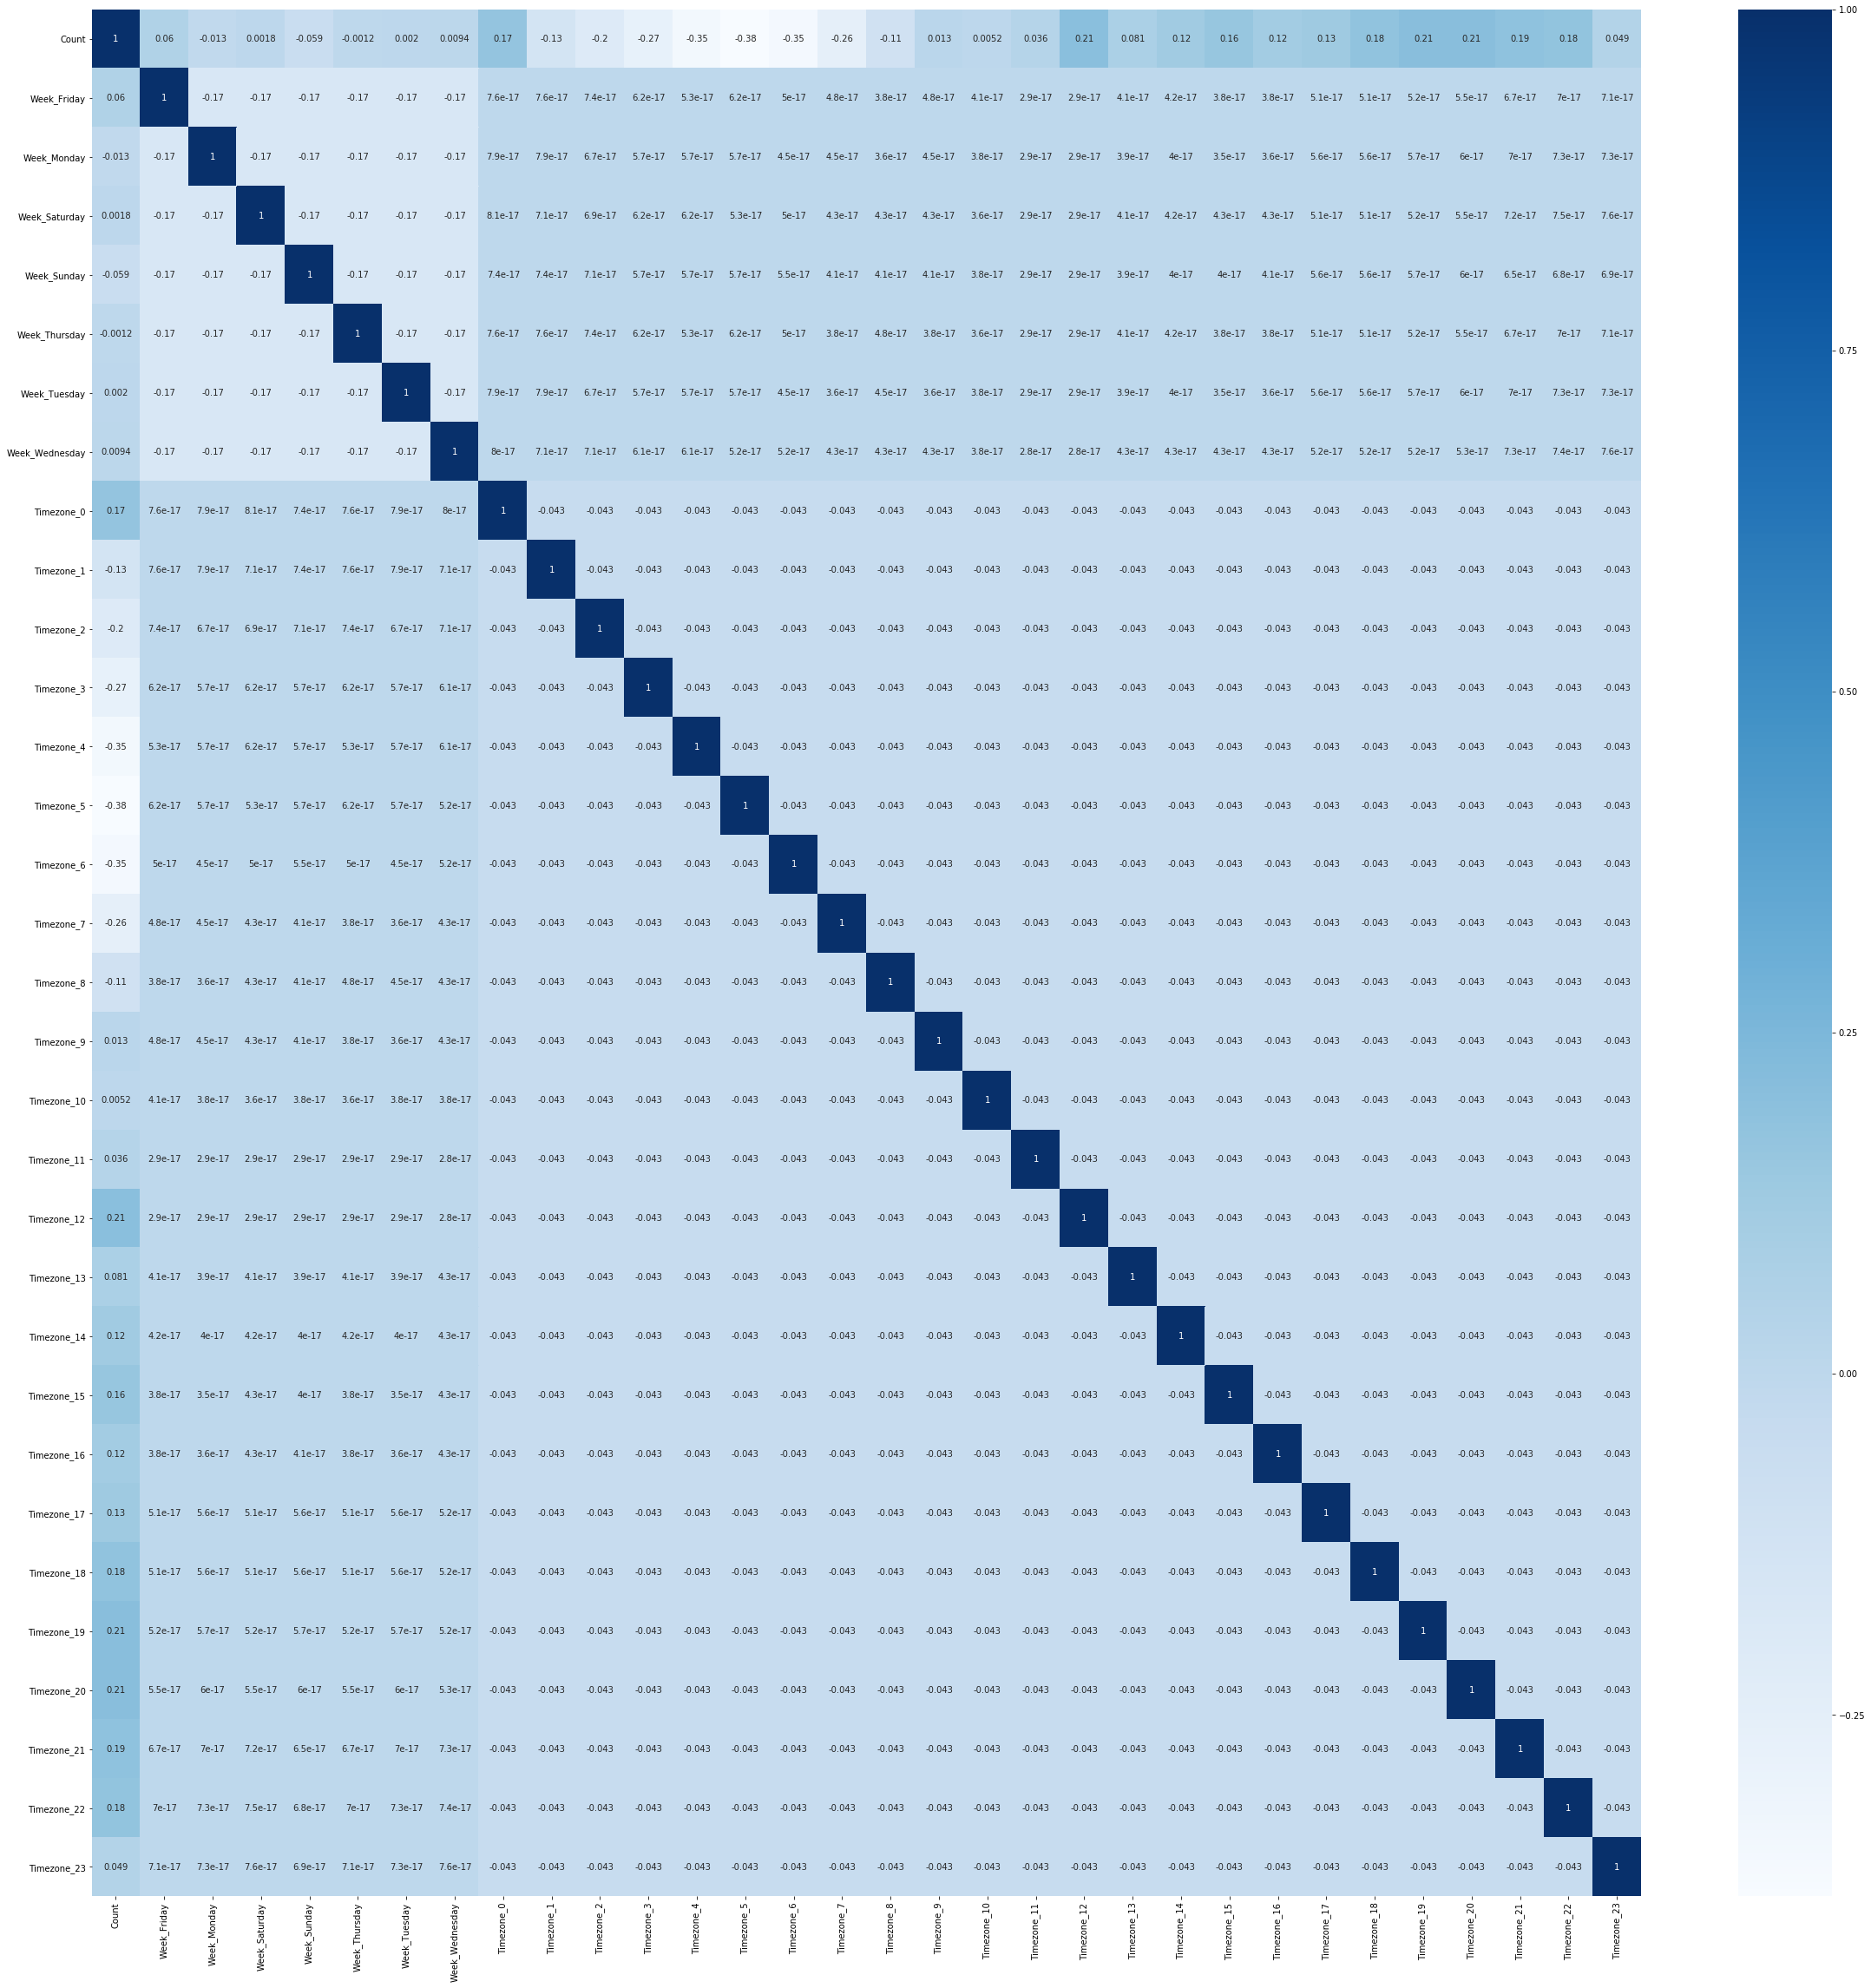

In [41]:
plt.figure(figsize=(40,40))
ax = sns.heatmap(dfw.corr(), annot = True, cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# ------------------------------------------------------------------------

In [12]:
week_lst = list(week1_1['Week'].unique())

In [13]:
week_lst

['Tuesday', 'Monday', 'Thursday', 'Friday', 'Saturday', 'Wednesday', 'Sunday']

In [14]:
wt_lst = []

for i in range(len(week_lst)):
    wt_lst.append(week1_2[week1_2['Week'] == week_lst[i]])

In [15]:
# wt_lst[6].Week

## Visualization

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=wt_lst[1].Timezone, y=wt_lst[1].Count, name="Monday",mode='lines+markers', line = dict(color='red', width = 2)))
fig.add_trace(go.Scatter(x=wt_lst[0].Timezone, y=wt_lst[0].Count, name="Tuesday",mode='lines+markers', line = dict(color='orange', width = 2)))
fig.add_trace(go.Scatter(x=wt_lst[5].Timezone, y=wt_lst[5].Count, name="Wendesday",mode='lines+markers', line = dict(color='yellow', width = 2)))
fig.add_trace(go.Scatter(x=wt_lst[2].Timezone, y=wt_lst[2].Count, name="Thursday",mode='lines+markers', line = dict(color='green', width = 2)))
fig.add_trace(go.Scatter(x=wt_lst[3].Timezone, y=wt_lst[3].Count, name="Friday",mode='lines+markers', line = dict(color='skyblue', width = 2)))
fig.add_trace(go.Scatter(x=wt_lst[4].Timezone, y=wt_lst[4].Count, name="Saturday",mode='lines+markers', line = dict(color='blue', width = 2)))
fig.add_trace(go.Scatter(x=wt_lst[6].Timezone, y=wt_lst[6].Count, name="Sunday",mode='lines+markers', line = dict(color='violet', width = 2)))

fig.update_layout(title='Timezone Crime Count by Day of Week',
                   xaxis_title='Timezone',
                   yaxis_title='Count')

fig.show()

# 1-3. 평일/주말 Correlation

In [25]:
query = """SELECT *
FROM Time.Weekday_Isweek2""" 
project_id = 'modular-magpie-255714'

In [26]:
isweek = pd.read_gbq(query, project_id=project_id, dialect='standard', credentials=credentials)

In [31]:
wday = pd.get_dummies(isweek , columns=["IsWeek"])

In [42]:
isweek

IsWeek  Timezone   Count
0   Weekday         0  254248
1   Weekday         1  132371
2   Weekday         2  105121
3   Weekday         3   81231
4   Weekday         4   62176
5   Weekday         5   58196
6   Weekday         6   80089
7   Weekday         7  125827
8   Weekday         8  187886
9   Weekday         9  228906
10  Weekday        10  217543
11  Weekday        11  227588
12  Weekday        12  293714
13  Weekday        13  246206
14  Weekday        14  263447
15  Weekday        15  277075
16  Weekday        16  258387
17  Weekday        17  262015
18  Weekday        18  281124
19  Weekday        19  289975
20  Weekday        20  286139
21  Weekday        21  277277
22  Weekday        22  269628
23  Weekday        23  218184
24  Weekend         0  120487
25  Weekend         1   87239
26  Weekend         2   79326
27  Weekend         3   67428
28  Weekend         4   49880
29  Weekend         5   34873
30  Weekend         6   29308
31  Weekend         7   31671
32  Weekend         8   45315
33  Weekend         9   65424
34  Weekend        10   72883
35  Weekend        11   78530
36  Weekend        12   98366
37  Weekend        13   82746
38  Weekend        14   86682
39  Weekend        15   90963
40  Weekend        16   89696
41  Weekend        17   92230
42  Weekend        18   99102
43  Weekend        19  104364
44  Weekend        20  106979
45  Weekend        21  106342
46  Weekend        22  108614
47  Weekend        23   94362

In [33]:
wday.corr()

Timezone     Count  IsWeek_Weekday  IsWeek_Weekend
Timezone        1.000000  0.409531        0.000000        0.000000
Count           0.409531  1.000000        0.734226       -0.734226
IsWeek_Weekday  0.000000  0.734226        1.000000       -1.000000
IsWeek_Weekend  0.000000 -0.734226       -1.000000        1.000000

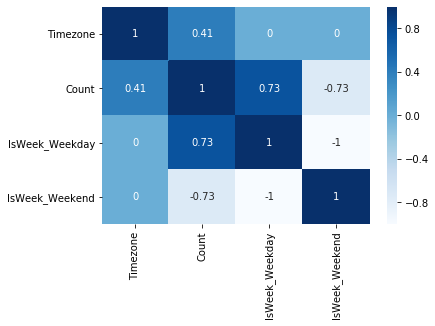

In [36]:
ax = sns.heatmap(wday.corr(), annot = True, cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# 1-4. 평일/주말/시간대 별

In [37]:
wday2 = pd.get_dummies(isweek , columns=["IsWeek","Timezone"])

In [38]:
wday2.corr()

Count  IsWeek_Weekday  IsWeek_Weekend    Timezone_0  \
Count           1.000000    7.342257e-01   -7.342257e-01  1.043371e-01   
IsWeek_Weekday  0.734226    1.000000e+00   -1.000000e+00 -4.340578e-18   
IsWeek_Weekend -0.734226   -1.000000e+00    1.000000e+00  4.340578e-18   
Timezone_0      0.104337   -4.340578e-18    4.340578e-18  1.000000e+00   
Timezone_1     -0.081837    1.012802e-17   -1.012802e-17 -4.347826e-02   
Timezone_2     -0.124038   -4.340578e-18    4.340578e-18 -4.347826e-02   
Timezone_3     -0.166989   -4.340578e-18    4.340578e-18 -4.347826e-02   
Timezone_4     -0.210918   -4.340578e-18    4.340578e-18 -4.347826e-02   
Timezone_5     -0.233705   -4.340578e-18    4.340578e-18 -4.347826e-02   
Timezone_6     -0.214109   -4.340578e-18    4.340578e-18 -4.347826e-02   
Timezone_7     -0.156380    1.012802e-17   -1.012802e-17 -4.347826e-02   
Timezone_8     -0.065525   -4.340578e-18    4.340578e-18 -4.347826e-02   
Timezone_9      0.007839    1.012802e-17   -1.012802e-17 -4.347826e-02   
Timezone_10     0.003153    1.012802e-17   -1.012802e-17 -4.347826e-02   
Timezone_11     0.021986    4.340578e-18   -4.340578e-18 -4.347826e-02   
Timezone_12     0.125154   -1.446859e-18    1.446859e-18 -4.347826e-02   
Timezone_13     0.049391    4.340578e-18   -4.340578e-18 -4.347826e-02   
Timezone_14     0.074806   -1.446859e-18    1.446859e-18 -4.347826e-02   
Timezone_15     0.096300    4.340578e-18   -4.340578e-18 -4.347826e-02   
Timezone_16     0.072351   -1.446859e-18    1.446859e-18 -4.347826e-02   
Timezone_17     0.079746    7.234297e-18   -7.234297e-18 -4.347826e-02   
Timezone_18     0.110927    4.340578e-18   -4.340578e-18 -4.347826e-02   
Timezone_19     0.127865    1.446859e-18   -1.446859e-18 -4.347826e-02   
Timezone_20     0.126400    1.012802e-17   -1.012802e-17 -4.347826e-02   
Timezone_21     0.114999    7.234297e-18   -7.234297e-18 -4.347826e-02   
Timezone_22     0.108546    3.617148e-18   -3.617148e-18 -4.347826e-02   
Timezone_23     0.029701    1.157488e-17   -1.157488e-17 -4.347826e-02   

                  Timezone_1    Timezone_2    Timezone_3    Timezone_4  \
Count          -8.183657e-02 -1.240375e-01 -1.669886e-01 -2.109178e-01   
IsWeek_Weekday  1.012802e-17 -4.340578e-18 -4.340578e-18 -4.340578e-18   
IsWeek_Weekend -1.012802e-17  4.340578e-18  4.340578e-18  4.340578e-18   
Timezone_0     -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_1      1.000000e+00 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_2     -4.347826e-02  1.000000e+00 -4.347826e-02 -4.347826e-02   
Timezone_3     -4.347826e-02 -4.347826e-02  1.000000e+00 -4.347826e-02   
Timezone_4     -4.347826e-02 -4.347826e-02 -4.347826e-02  1.000000e+00   
Timezone_5     -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_6     -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_7     -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_8     -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_9     -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_10    -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_11    -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_12    -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_13    -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_14    -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_15    -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_16    -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_17    -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_18    -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_19    -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_20    -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_21    -4.347826e-02 -4.347826e-02 -4.347826e-02 -4.347826e-02   
Timezone_22    -4.3478

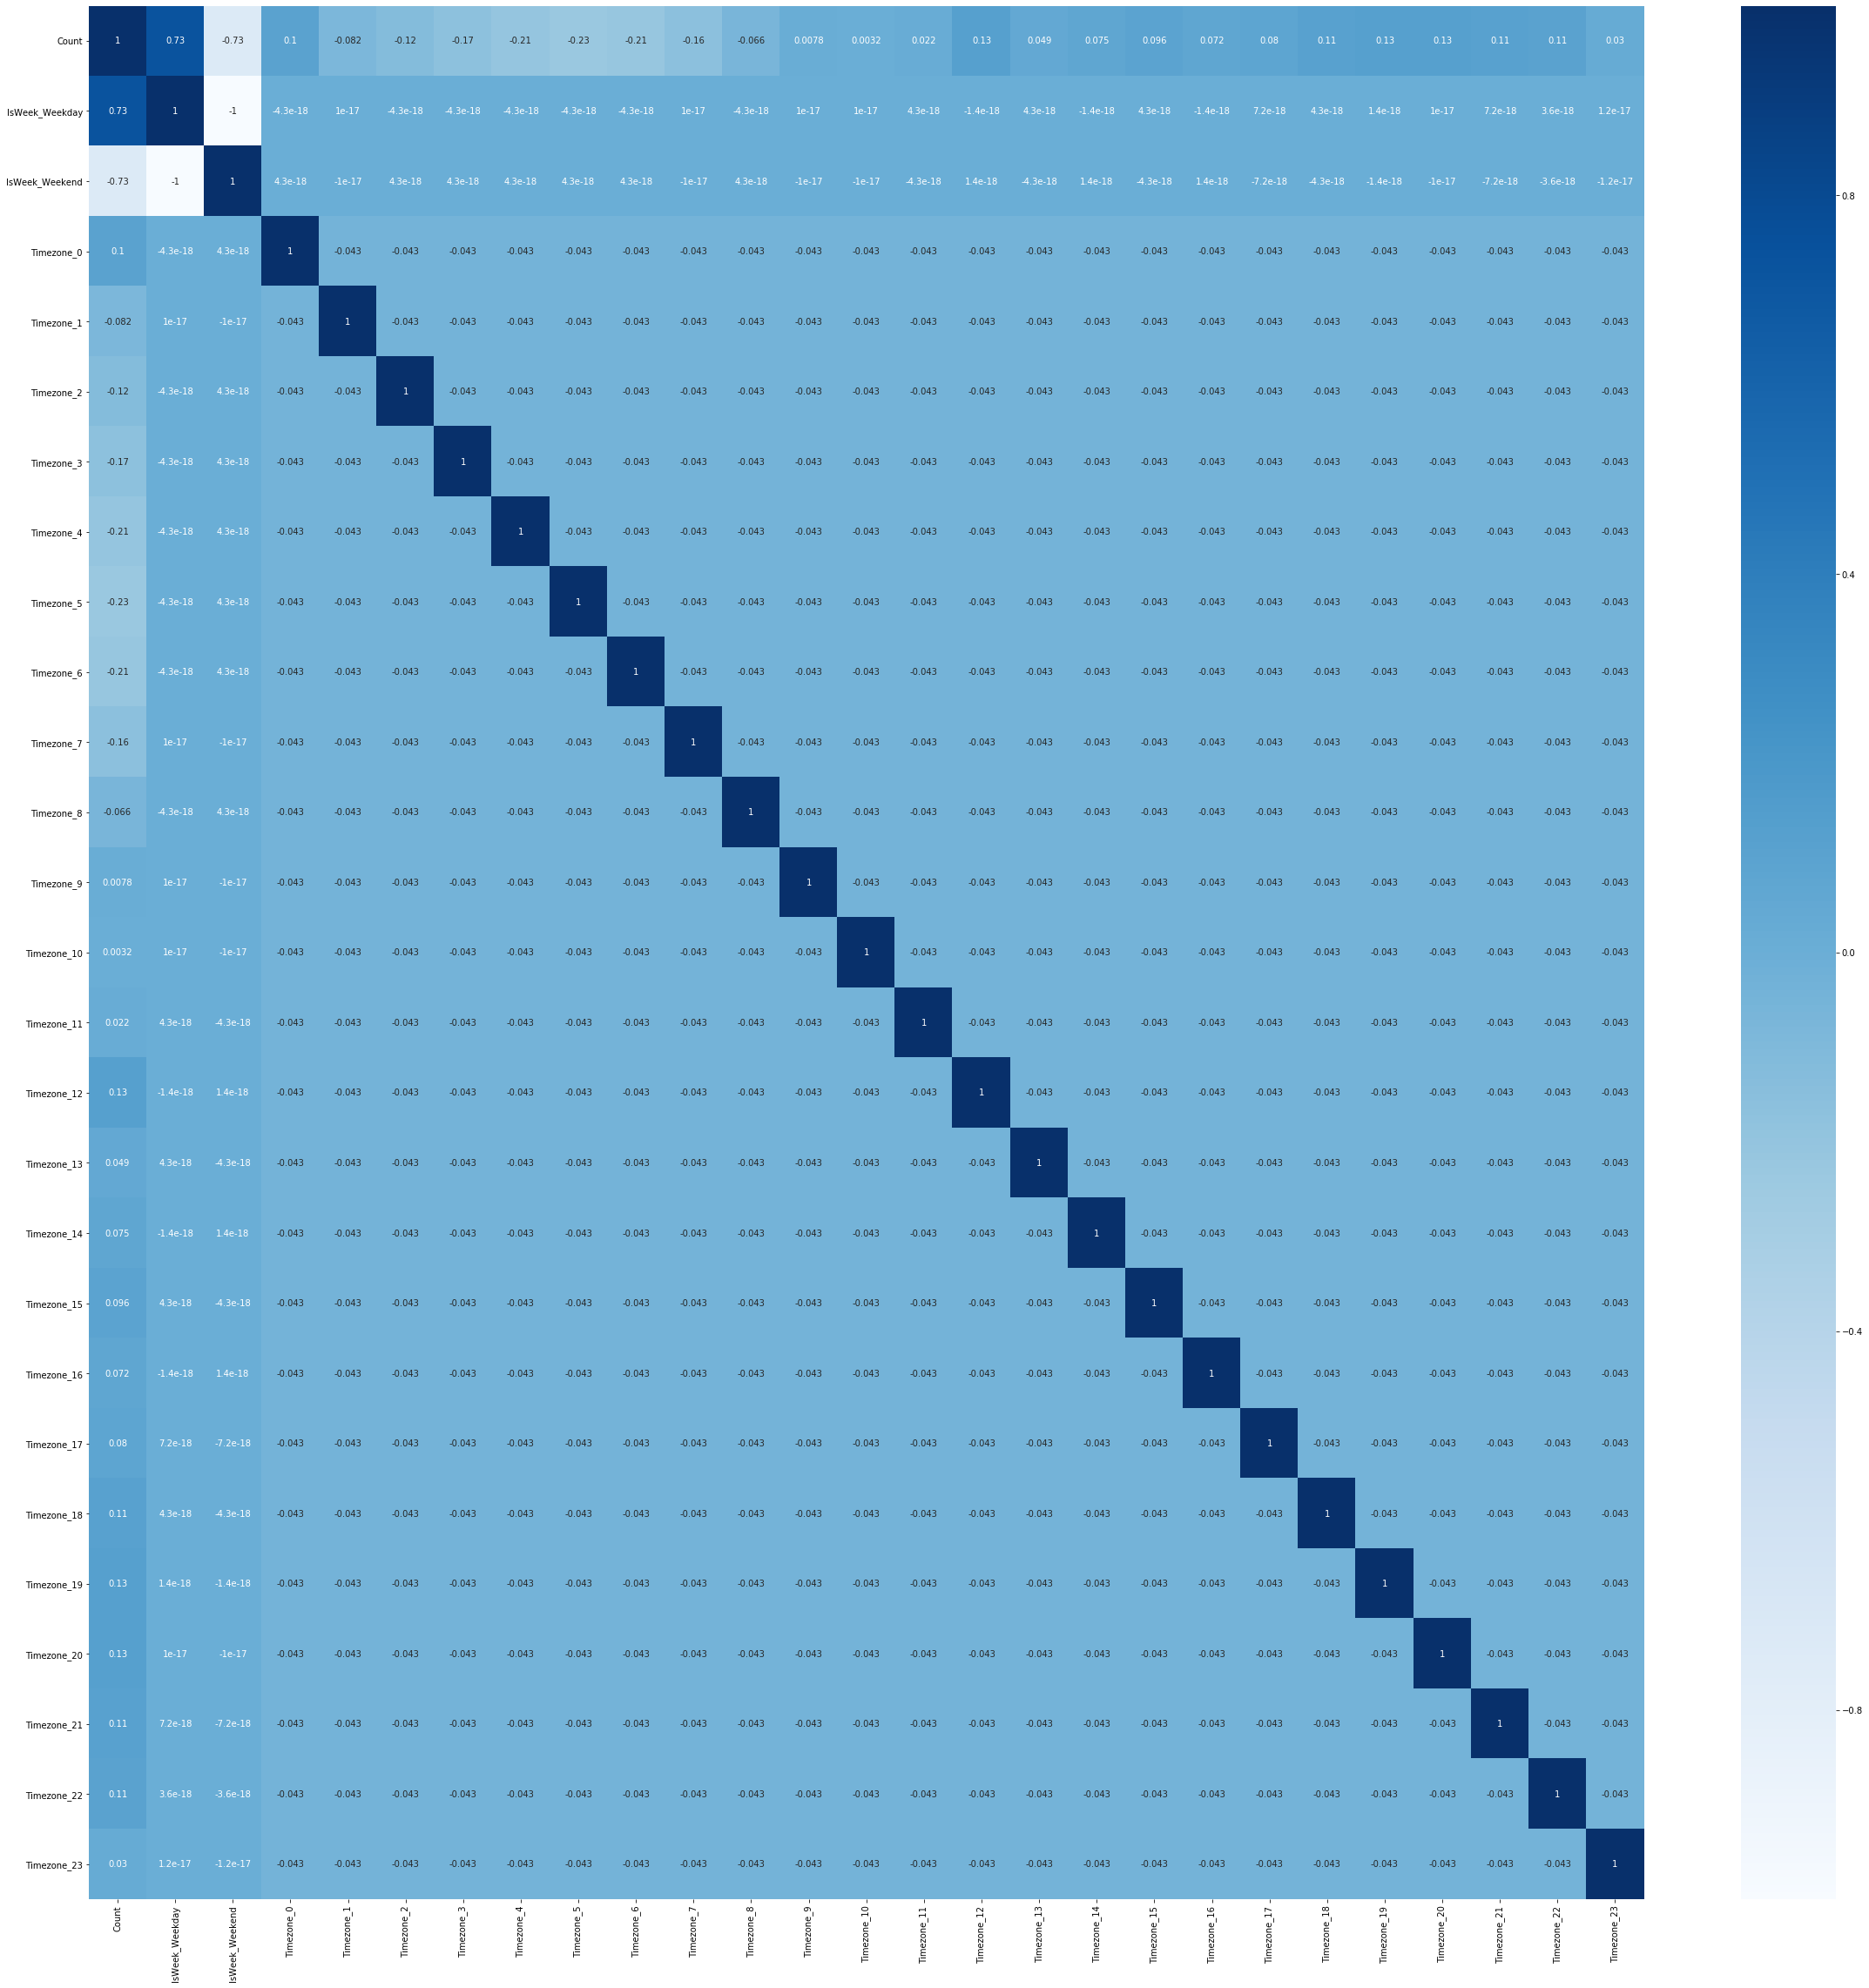

In [41]:
plt.figure(figsize=(40,40))
ax = sns.heatmap(wday2.corr(), annot = True, cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# 2. 년도월별 correlation

#### Import file from BigQuery

In [7]:
query = """SELECT *
FROM Time.2_year_month_v2""" 
project_id = 'modular-magpie-255714'

time2 = pd.read_gbq(query, project_id=project_id, dialect='standard', credentials=credentials)

In [8]:
time2

Year  Month  Count     Date
0    2001      1  37854   2001-1
1    2001      2  33608   2001-2
2    2001      3  40339   2001-3
3    2001      4  39852   2001-4
4    2001      5  41581   2001-5
5    2001      6  41464   2001-6
6    2001      7  44370   2001-7
7    2001      8  43755   2001-8
8    2001      9  41250   2001-9
9    2001     10  42794  2001-10
10   2001     11  39400  2001-11
11   2001     12  36611  2001-12
12   2002      1  36449   2002-1
13   2002      2  32195   2002-2
14   2002      3  36639   2002-3
15   2002      4  38283   2002-4
16   2002      5  42045   2002-5
17   2002      6  41891   2002-6
18   2002      7  44968   2002-7
19   2002      8  43262   2002-8
20   2002      9  41389   2002-9
21   2002     10  41792  2002-10
22   2002     11  35578  2002-11
23   2002     12  37036  2002-12
24   2003      1  35962   2003-1
25   2003      2  32422   2003-2
26   2003      3  38571   2003-3
27   2003      4  39671   2003-4
28   2003      5  41069   2003-5
29   2003      6  40014   2003-6
..    ...    ...    ...      ...
195  2017      4  21484   2017-4
196  2017      5  23176   2017-5
197  2017      6  23578   2017-6
198  2017      7  24612   2017-7
199  2017      8  24431   2017-8
200  2017      9  22534   2017-9
201  2017     10  22484  2017-10
202  2017     11  20979  2017-11
203  2017     12  20346  2017-12
204  2018      1  20209   2018-1
205  2018      2  17164   2018-2
206  2018      3  21037   2018-3
207  2018      4  20929   2018-4
208  2018      5  24453   2018-5
209  2018      6  23904   2018-6
210  2018      7  24846   2018-7
211  2018      8  24923   2018-8
212  2018      9  22559   2018-9
213  2018     10  22307  2018-10
214  2018     11  20073  2018-11
215  2018     12  21023  2018-12
216  2019      1  19315   2019-1
217  2019      2  18070   2019-2
218  2019      3  20121   2019-3
219  2019      4  20664   2019-4
220  2019      5  23301   2019-5
221  2019      6  23103   2019-6
222  2019      7  24307   2019-7
223  2019      8  23605   2019-8
224  2019      9  13539   2019-9

[225 rows x 4 columns]

In [9]:
tdf = time2[["Month","Count"]]

In [11]:
tdf = pd.get_dummies(tdf, columns=["Month"])

In [12]:
tdf

Count  Month_1  Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  \
0    37854        1        0        0        0        0        0        0   
1    33608        0        1        0        0        0        0        0   
2    40339        0        0        1        0        0        0        0   
3    39852        0        0        0        1        0        0        0   
4    41581        0        0        0        0        1        0        0   
5    41464        0        0        0        0        0        1        0   
6    44370        0        0        0        0        0        0        1   
7    43755        0        0        0        0        0        0        0   
8    41250        0        0        0        0        0        0        0   
9    42794        0        0        0        0        0        0        0   
10   39400        0        0        0        0        0        0        0   
11   36611        0        0        0        0        0        0        0   
12   36449        1        0        0        0        0        0        0   
13   32195        0        1        0        0        0        0        0   
14   36639        0        0        1        0        0        0        0   
15   38283        0        0        0        1        0        0        0   
16   42045        0        0        0        0        1        0        0   
17   41891        0        0        0        0        0        1        0   
18   44968        0        0        0        0        0        0        1   
19   43262        0        0        0        0        0        0        0   
20   41389        0        0        0        0        0        0        0   
21   41792        0        0        0        0        0        0        0   
22   35578        0        0        0        0        0        0        0   
23   37036        0        0        0        0        0        0        0   
24   35962        1        0        0        0        0        0        0   
25   32422        0        1        0        0        0        0        0   
26   38571        0        0        1        0        0        0        0   
27   39671        0        0        0        1        0        0        0   
28   41069        0        0        0        0        1        0        0   
29   40014        0        0        0        0        0        1        0   
..     ...      ...      ...      ...      ...      ...      ...      ...   
195  21484        0        0        0        1        0        0        0   
196  23176        0        0        0        0        1        0        0   
197  23578        0        0        0        0        0        1        0   
198  24612        0        0        0        0        0        0        1   
199  24431        0        0        0        0        0        0        0   
200  22534        0        0        0        0        0        0        0   
201  22484        0        0        0        0        0        0        0   
202  20979        0        0        0        0        0        0        0   
203  20346        0        0        0        0        0        0        0   
204  20209        1        0        0        0        0        0        0   
205  17164        0        1        0        0        0        0        0   
206  21037        0        0        1        0        0        0        0   
207  20929        0        0        0        1        0        0        0   
208  24453        0        0        0        0        1        0        0   
209  23904        0        0        0        0        0        1        0   
210  24846        0        0        0        0        0        0        1   
211  24923        0        0        0        0        0        0        0   
212  22559        0        0        0        0        0        0        0   
213  22307        0        0        0        0        0        0        0   
214  20073        0        0        0        0        0        0        0   
2

In [13]:
tdf.corr()

Count   Month_1   Month_2   Month_3   Month_4   Month_5  \
Count     1.000000 -0.090245 -0.223121 -0.021832 -0.017711  0.082887   
Month_1  -0.090245  1.000000 -0.092233 -0.092233 -0.092233 -0.092233   
Month_2  -0.223121 -0.092233  1.000000 -0.092233 -0.092233 -0.092233   
Month_3  -0.021832 -0.092233 -0.092233  1.000000 -0.092233 -0.092233   
Month_4  -0.017711 -0.092233 -0.092233 -0.092233  1.000000 -0.092233   
Month_5   0.082887 -0.092233 -0.092233 -0.092233 -0.092233  1.000000   
Month_6   0.073986 -0.092233 -0.092233 -0.092233 -0.092233 -0.092233   
Month_7   0.140533 -0.092233 -0.092233 -0.092233 -0.092233 -0.092233   
Month_8   0.125200 -0.092233 -0.092233 -0.092233 -0.092233 -0.092233   
Month_9   0.023250 -0.092233 -0.092233 -0.092233 -0.092233 -0.092233   
Month_10  0.073408 -0.089556 -0.089556 -0.089556 -0.089556 -0.089556   
Month_11 -0.053268 -0.089556 -0.089556 -0.089556 -0.089556 -0.089556   
Month_12 -0.115402 -0.089556 -0.089556 -0.089556 -0.089556 -0.089556   

           Month_6   Month_7   Month_8   Month_9  Month_10  Month_11  Month_12  
Count     0.073986  0.140533  0.125200  0.023250  0.073408 -0.053268 -0.115402  
Month_1  -0.092233 -0.092233 -0.092233 -0.092233 -0.089556 -0.089556 -0.089556  
Month_2  -0.092233 -0.092233 -0.092233 -0.092233 -0.089556 -0.089556 -0.089556  
Month_3  -0.092233 -0.092233 -0.092233 -0.092233 -0.089556 -0.089556 -0.089556  
Month_4  -0.092233 -0.092233 -0.092233 -0.092233 -0.089556 -0.089556 -0.089556  
Month_5  -0.092233 -0.092233 -0.092233 -0.092233 -0.089556 -0.089556 -0.089556  
Month_6   1.000000 -0.092233 -0.092233 -0.092233 -0.089556 -0.089556 -0.089556  
Month_7  -0.092233  1.000000 -0.092233 -0.092233 -0.089556 -0.089556 -0.089556  
Month_8  -0.092233 -0.092233  1.000000 -0.092233 -0.089556 -0.089556 -0.089556  
Month_9  -0.092233 -0.092233 -0.092233  1.000000 -0.089556 -0.089556 -0.089556  
Month_10 -0.089556 -0.089556 -0.089556 -0.089556  1.000000 -0.086957 -0.086957  
Month_11 -0.089556 -0.089556 -0.089556 -0.089556 -0.086957  1.000000 -0.086957  
Month_12 -0.089556 -0.089556 -0.089556 -0.089556 -0.086957 -0.086957  1.000000

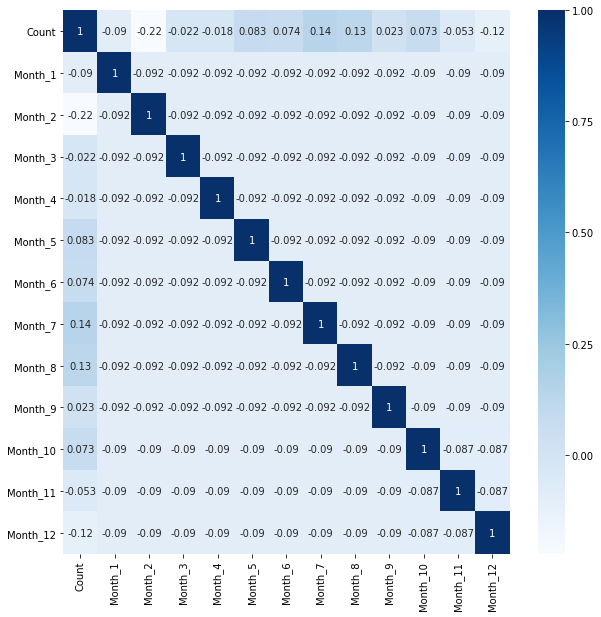

In [14]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(tdf.corr(), annot = True, cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()